### Import Libraries & Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loding the dataset


In [2]:
DS_data=pd.read_csv("Diwali_Sales_Data.csv",encoding='unicode_escape')

In [3]:
DS_data.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Shape of data frame

In [4]:
No_of_row_and_coulmns=DS_data.shape
No_of_row_and_coulmns

(11251, 15)

### We have 11251 rows and 15 columns in our dataset

### Checking data type

In [5]:
DS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
DS_data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
cols = DS_data.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} nos of unique values in {} column out of {}'.format(DS_data[cols[i]].nunique(), cols[i], len(DS_data)))
Unique_Values()

There are 3755 nos of unique values in User_ID column out of 11251
There are 1250 nos of unique values in Cust_name column out of 11251
There are 2351 nos of unique values in Product_ID column out of 11251
There are 2 nos of unique values in Gender column out of 11251
There are 7 nos of unique values in Age Group column out of 11251
There are 81 nos of unique values in Age column out of 11251
There are 2 nos of unique values in Marital_Status column out of 11251
There are 16 nos of unique values in State column out of 11251
There are 5 nos of unique values in Zone column out of 11251
There are 15 nos of unique values in Occupation column out of 11251
There are 18 nos of unique values in Product_Category column out of 11251
There are 4 nos of unique values in Orders column out of 11251
There are 6584 nos of unique values in Amount column out of 11251


In [8]:
#To check if there are null values in the df, use isnull() method.
DS_data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

### Data Processing:
- remove null_values
- remove duplicates
- remove unwanted columns
- Standarize column names

In [9]:
# drop missing values
DS_data.dropna(inplace = True)

In [10]:
#To check if there are null values in the df, use isnull() method.
DS_data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
# change data type
DS_data['Amount'] = DS_data['Amount'].astype('int')

In [12]:
DS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [13]:
DS_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### To see all the data in product category

In [14]:
DS_data['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

### To see all the data in Zone category

In [15]:
DS_data['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

### To see all the data in Occupation category

In [16]:
DS_data['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

### To see all the data in Age group category

In [17]:
DS_data['Age Group'].unique()

array(['26-35', '0-17', '18-25', '51-55', '46-50', '55+', '36-45'],
      dtype=object)

### Exploratory Data Analysis (EDA):
In this phase, we will be calculating statistical summaries, and visualization of our analysis


In [18]:
# Check the statistics of numerical columns
DS_data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


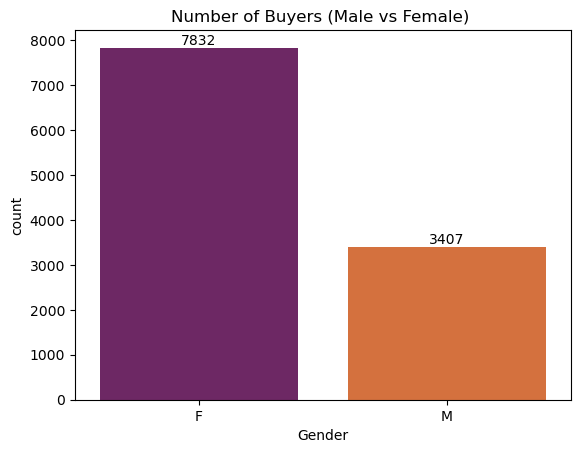

In [19]:
# check how many males and females purchased products
ax = sns.countplot(x = 'Gender',data =DS_data,palette="inferno")
plt.title("Number of Buyers (Male vs Female) ")
for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Count of M & F on Maritial_Status')

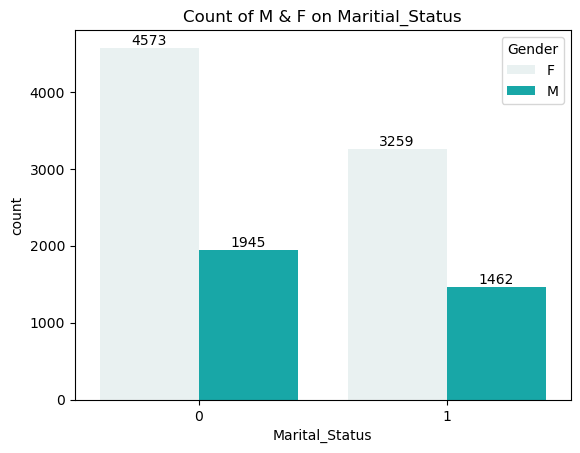

In [20]:
ax=sns.countplot(x='Marital_Status',hue='Gender',data=DS_data,color = 'c')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of M & F on Maritial_Status') 

###  we can see that most of the buyers are females more than Mens

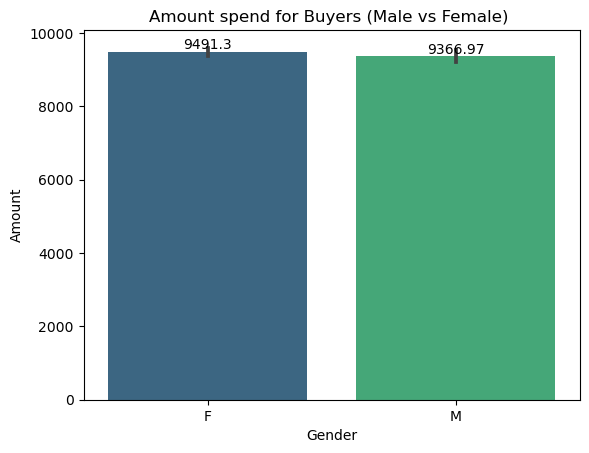

In [21]:
ax = sns.barplot(x = 'Gender',y='Amount',data =DS_data,palette='viridis')
plt.title("Amount spend for Buyers (Male vs Female) ")
for bars in ax.containers:
    ax.bar_label(bars)

In [22]:
sales_gen = DS_data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


Text(0.5, 1.0, 'Age Group count')

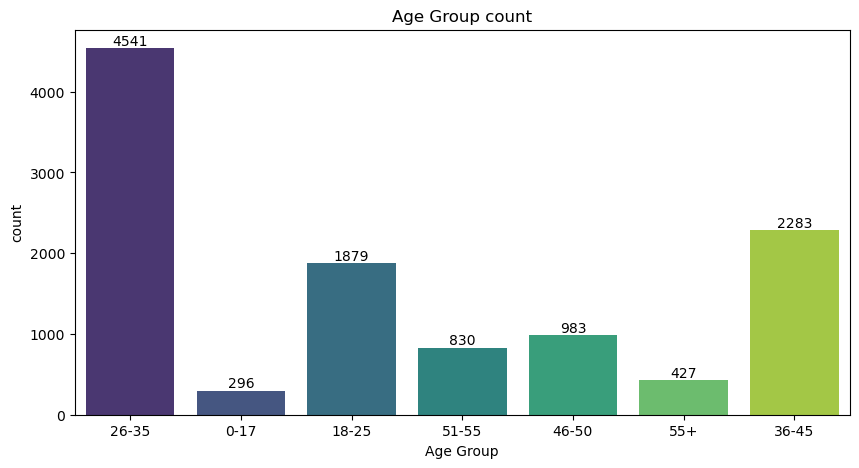

In [23]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data=DS_data,x='Age Group',palette="viridis")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Age Group count")

Text(0.5, 1.0, 'Age Group based on gender')

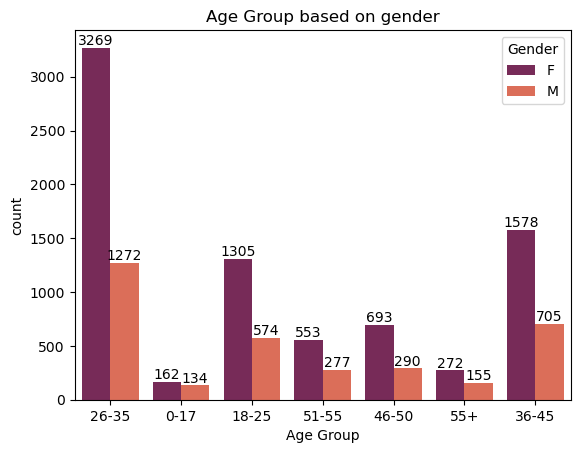

In [24]:
ax = sns.countplot(data=DS_data,x='Age Group',hue='Gender',palette="rocket")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Age Group based on gender")

### Amount spent by customer in each age group

In [25]:
# Amount spent by Age Groups
sales_age = DS_data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


Text(0.5, 1.0, 'Amount spent by customer according to Age Groups')

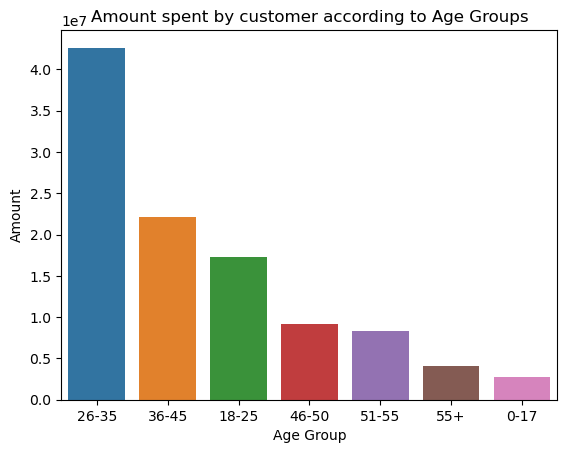

In [26]:
ax=sns.barplot(data=sales_age,x='Age Group',y='Amount')
plt.title('Amount spent by customer according to Age Groups')

### we can see that most of the buyers are of age group between 26-35 years more than age group of0-17

In [27]:
states = DS_data.State.value_counts().head(10)
states

Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Name: State, dtype: int64

In [28]:
Orders = DS_data.Orders.value_counts()
Orders

2    2893
1    2808
4    2773
3    2765
Name: Orders, dtype: int64

In [29]:
# total number of orders from top 10 states
order_state = DS_data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
order_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


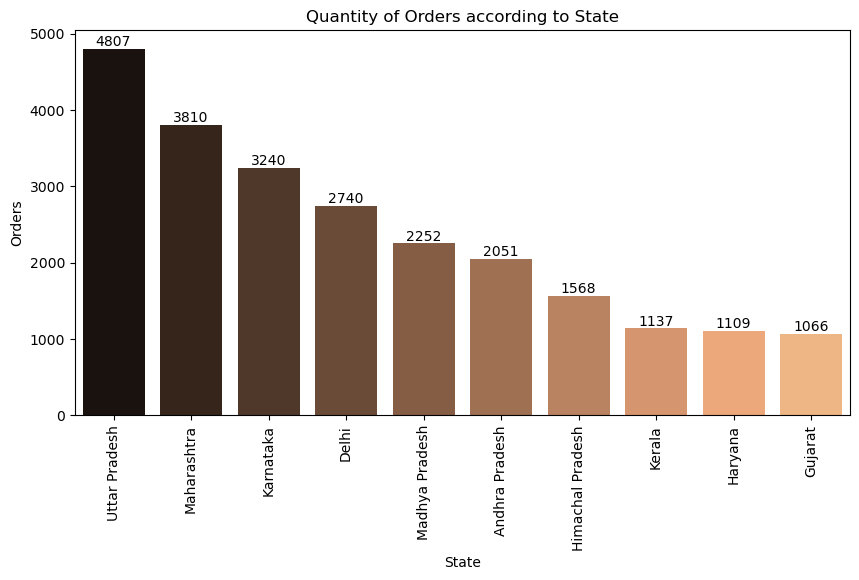

In [30]:
plt.figure(figsize = (10,5))
ax= sns.barplot(data = order_state, x = 'State',y= 'Orders',palette="copper")
plt.xticks(rotation=90)
plt.title("Quantity of Orders according to State")
for bars in ax.containers:
    ax.bar_label(bars)

###  Most of the orders are from uttarpradesh,Maharshtra and Karnataka states

In [31]:
# total amount/sales from top 10 states
Sales_state = DS_data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
Sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


Text(0.5, 1.0, 'Total Sales according to State')

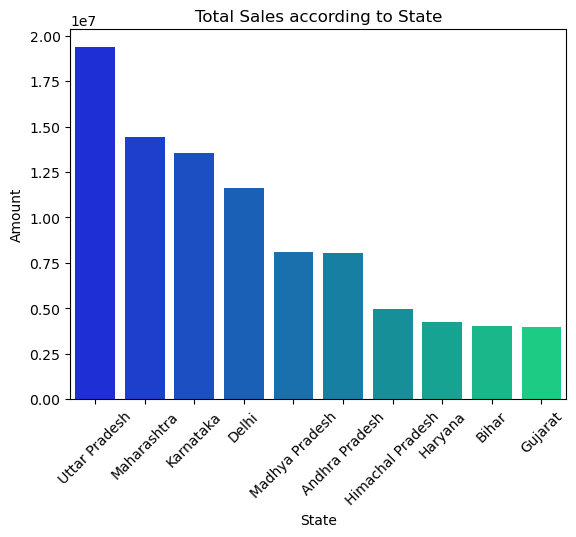

In [32]:
ax= sns.barplot(data = Sales_state, x = 'State',y= 'Amount',palette='winter')
plt.xticks(rotation=45)
plt.title("Total Sales according to State")

### we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

Text(0.5, 1.0, 'Gender Based on state')

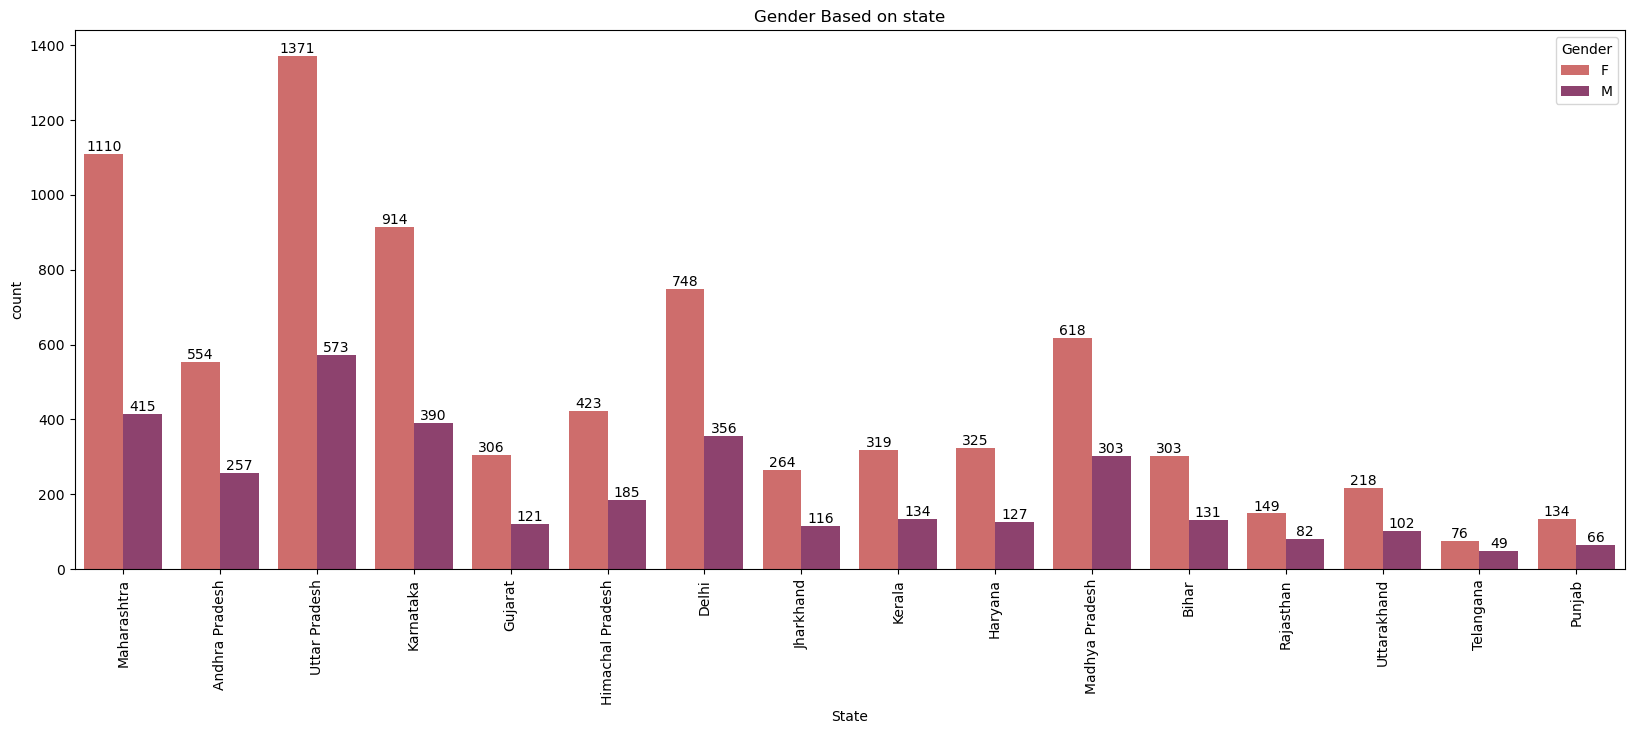

In [33]:
plt.figure(figsize = (20,7))
ax = sns.countplot(data=DS_data,x='State',hue='Gender',palette="flare")
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender Based on state")

Text(0.5, 1.0, 'Order based on gender')

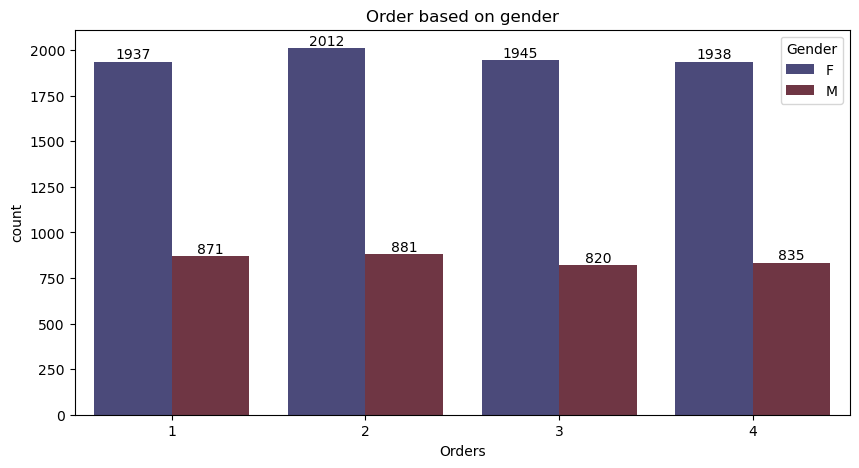

In [34]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data=DS_data,x='Orders',hue='Gender',palette="icefire")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Order based on gender")

Text(0.5, 1.0, 'Occupation count')

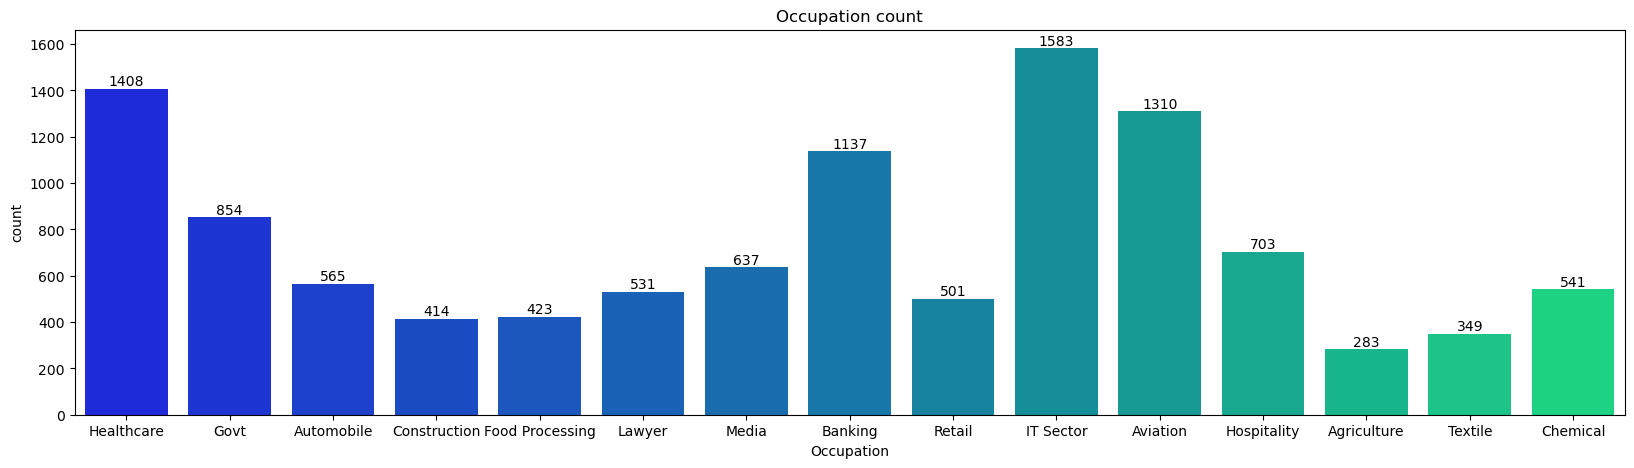

In [35]:
plt.figure(figsize = (20,5))
ax = sns.countplot(data = DS_data, x = 'Occupation',palette='winter')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Occupation count")

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

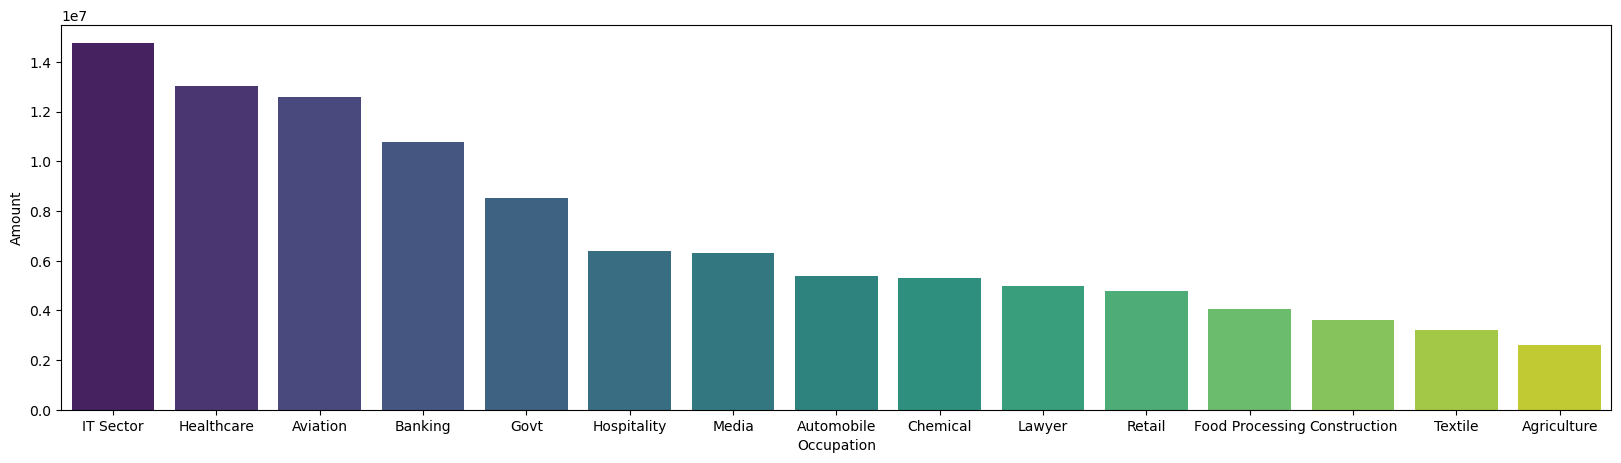

In [36]:
Sector = DS_data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
Sector

plt.figure(figsize = (20,5))
sns.barplot(data = Sector, x = 'Occupation',y= 'Amount',palette='viridis')

### we can see that most of the buyers are working in IT, Healthcare and Aviation sector

In [37]:
Product = DS_data.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
Product

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6110
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2646
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,889
14,Sports Products,870
13,Pet Care,536


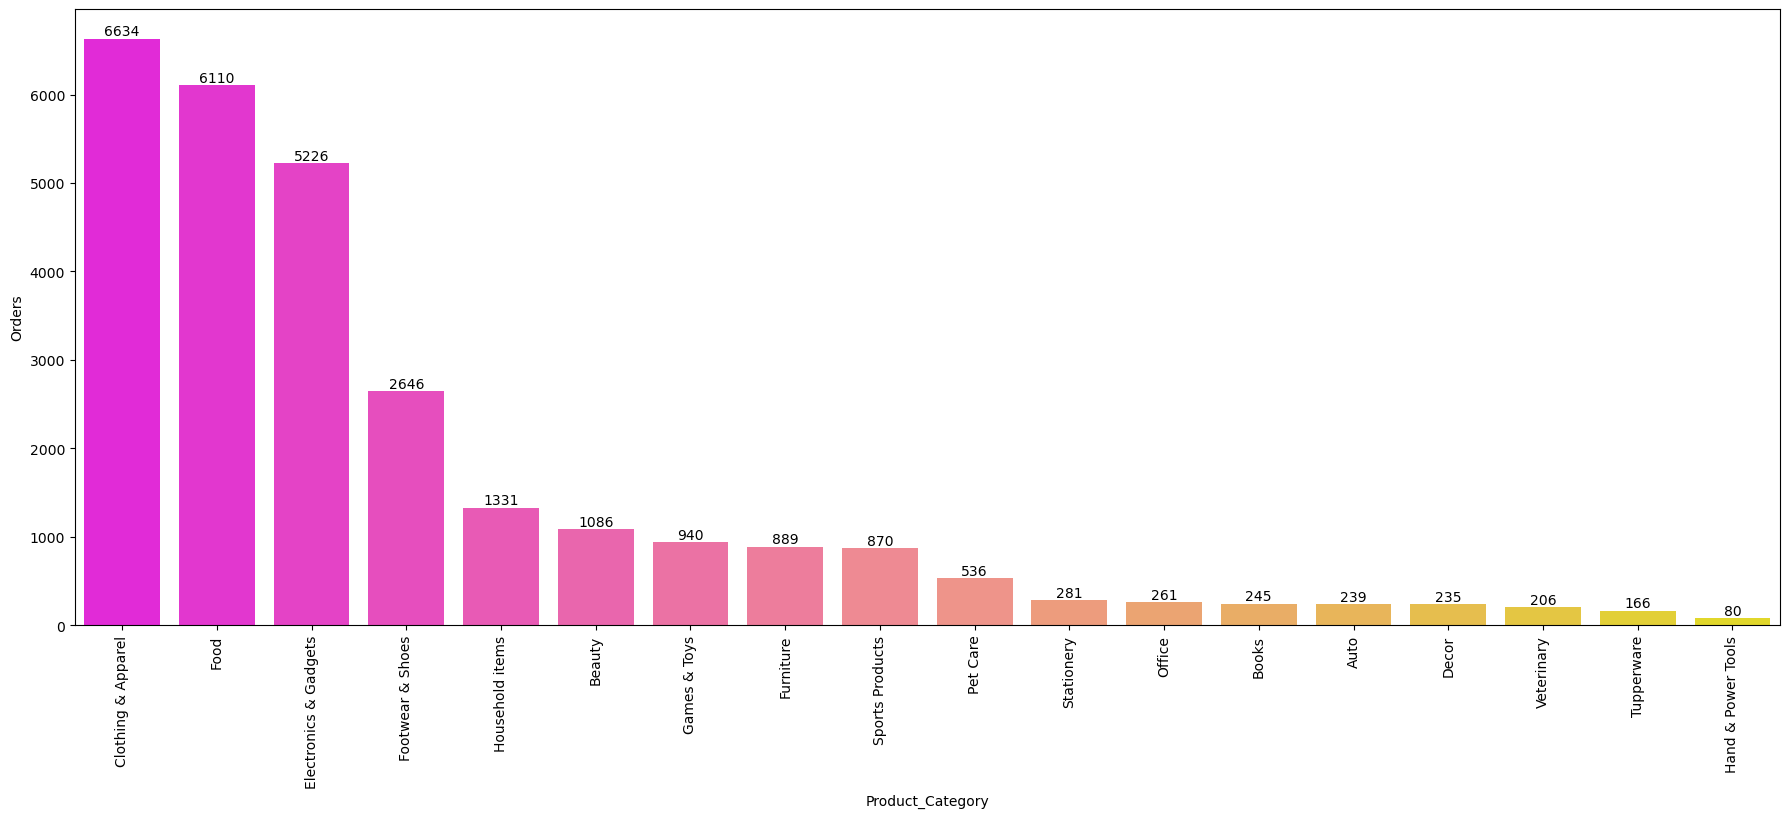

In [38]:
plt.figure(figsize = (22,8))
plt.xticks(rotation=90)
ax = sns.barplot(data=Product, x='Product_Category',y='Orders',palette='spring')
for bars in ax.containers:
    ax.bar_label(bars)

### Zone

Text(0.5, 1.0, 'Zone count')

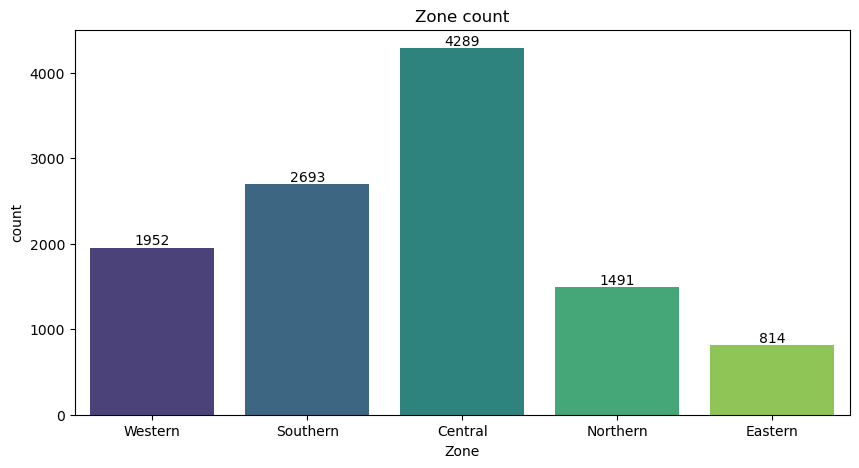

In [39]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data=DS_data,x='Zone',palette="viridis")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Zone count")

In [40]:
Zone_sales= DS_data.groupby(['Zone'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
Zone_sales

,Zone,Amount
0,Central,41600872
3,Southern,26606667
4,Western,18373625
2,Northern,12618752
1,Eastern,7049213


Text(0.5, 1.0, 'Total Sales according to Zone')

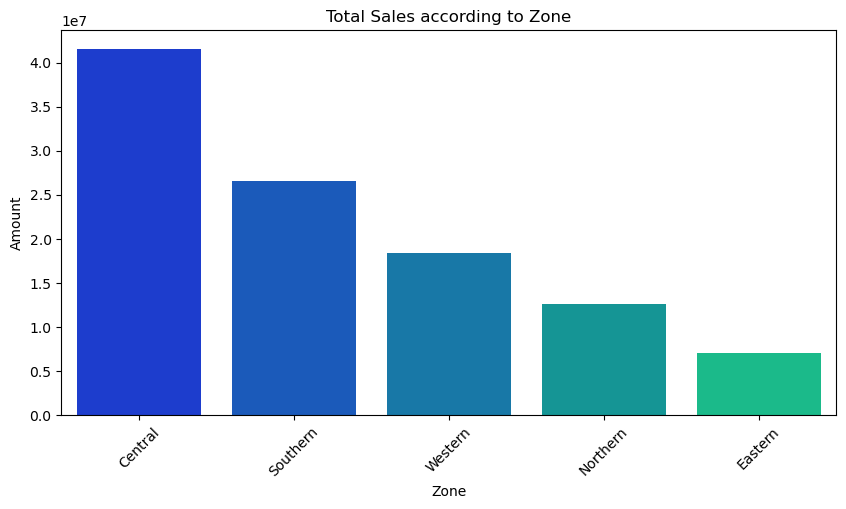

In [41]:
plt.figure(figsize = (10,5))
ax= sns.barplot(data = Zone_sales, x = 'Zone',y= 'Amount',palette='winter')
plt.xticks(rotation=45)
plt.title("Total Sales according to Zone")

In [42]:
Zone_order= DS_data.groupby(['Zone'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
Zone_order

,Zone,Orders
0,Central,10623
3,Southern,6740
4,Western,4876
2,Northern,3727
1,Eastern,2015


Text(0.5, 1.0, 'Total order according to Zone wise')

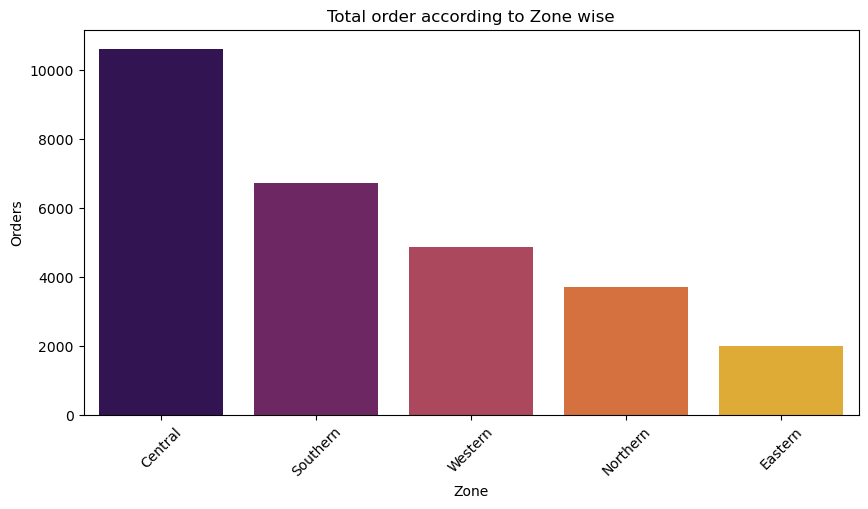

In [43]:
plt.figure(figsize = (10,5))
ax= sns.barplot(data =Zone_order, x = 'Zone',y= 'Orders',palette='inferno')
plt.xticks(rotation=45)
plt.title("Total order according to Zone wise")

### Key_Insights:
1️⃣ Gender Shopping Trends: Females tend to shop more than males.

2️⃣ Age Group Shopping Trends: Both females and males in the 26-35 age group shop more compared to the 0-17 age group.

3️⃣ Geographic Sales: The highest sales are from Uttar Pradesh, Maharashtra, and Karnataka, while Kerala, Haryana, and Gujarat have the lowest.

4️⃣ Occupation-based Shopping: IT-sector professionals have the highest order amounts and quantities, while lawyers rank lowest among the top 10 occupations.

5️⃣ Product Categories: Clothing & Apparel, Food, and Electronics are the most purchased, while Stationery, Furniture, Pet Care, and Sports items are the least.

6️⃣ Regional Sales: The Central region has the highest order volume, surpassing the Eastern region.

こちらの洞察をまとめて

性別: 女性は男性よりもよく買い物します。
年齢: 26〜35歳の人が、0〜17歳の人よりも多く買い物をします。
地域: ウッタル・プラデーシュ州、マハラシュトラ州、カルナータカ州での売上が最も高く、ケーララ州、ハリヤーナ州、グジャラート州は低いです。
職業: IT関係の仕事をしている人が最も多く買い物をし、弁護士は最も少ないです。
婚姻状況: 未婚の人たちは既婚者よりもよく買い物をします。
商品カテゴリ: 衣料品、食品、エレクトロニクスがよく売れ、文房具、家具、ペットケア、スポーツ用品はあまり売れません。
地域別売上: 中部地域の売上が東部地域を超えています。